Version English Spanish International Master's work in Data Science, (Europe). Pre Machine Learning Module

Version ingles español trabajo de Master internacional en Data Science, Europa. Modulo Pre Machine Learning.

**# Correctional offender management profiling for alternative sanctions

The introduction of data science into the field of law and justice is becoming more and more frequent, a well-known example of this is the COMPAS (Correctional offender management profiling for alternative sanctions) system that is used in several states of the United States. to make an assessment of the risk of recidivism of detained persons
__________________________________________

Cada día es más frecuente la introducción de la ciencia de datos en el ámbito del derecho y la justicia.Un ejemplo bien conocido de ello es el sistema COMPAS (Correctional offender management profiling for alternative sanctions) que se usa en varios estados de los Estados Unidos para hacer una evaluación del riesgo de reincidencia de las personas detenidas




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
pd.set_option('display.max_columns', 60) #Display 60 columns for better visualitation. 
from pandas.api.types import CategoricalDtype
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('./datos/compas-scores.csv')
df = pd.DataFrame(df)

### ¿What we will do in this notbook? 
### ¿Que se realizará en este notbook? 
1.-Load the data and carry out an exploratory analysis and an evaluation of the quality of the data necessary for the rest of the case. Specifically, evaluate the integrity, validity and timeliness of the data and propose mitigation strategies for the possible problems encountered.

1.-Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso. Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.

## Exploratory analisis

In [4]:
df.head(4)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11757 non-null  int64  
 1   name                     11757 non-null  object 
 2   first                    11757 non-null  object 
 3   last                     11757 non-null  object 
 4   compas_screening_date    11757 non-null  object 
 5   sex                      11757 non-null  object 
 6   dob                      11757 non-null  object 
 7   age                      11757 non-null  int64  
 8   age_cat                  11757 non-null  object 
 9   race                     11757 non-null  object 
 10  juv_fel_count            11757 non-null  int64  
 11  decile_score             11757 non-null  int64  
 12  juv_misd_count           11757 non-null  int64  
 13  juv_other_count          11757 non-null  int64  
 14  priors_count          

In [6]:
#'num_vr_cases', 'num_r_cases', son columnas completamente vacias que se deben eliminar
#Empty columns
df = df.drop(['num_vr_cases', 'num_r_cases'], axis =1)

In [7]:
#Selection of Columns that will be useful to find the desired insights 
#Seleccion de Columnas que seran de utilidad para encontrar los insights buscados

df1 = df[['id', 'name', 'sex', 'age', 'age_cat', 'is_recid', 'is_violent_recid','decile_score', 'v_decile_score', 'vr_offense_date', 
'r_offense_date', 'race', 'score_text', 'v_score_text', 'priors_count', 'compas_screening_date']].copy()

In [8]:
df1.head(3)

,id,name,sex,age,age_cat,is_recid,is_violent_recid,decile_score,v_decile_score,vr_offense_date,r_offense_date,race,score_text,v_score_text,priors_count,compas_screening_date
0,1,miguel hernandez,Male,69,Greater than 45,0,0,1,1,NaN,NaN,Other,Low,Low,0,2013-08-14
1,2,michael ryan,Male,31,25 - 45,-1,0,5,2,NaN,NaN,Caucasian,Medium,Low,0,2014-12-31
2,3,kevon dixon,Male,34,25 - 45,1,1,3,1,2013-07-05,2013-07-05,African-American,Low,Low,0,2013-01-27


### I will analyze column by column integrity, validity and timeliness
### Analizaré columna por columna integridad, validez y actualidad

In [9]:
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, '\t', v)

In [10]:
describe_columna(df1, 'id')
#Columna se encuentra completa, con solo valores unicos, utilizables como indices e identificadores.

Columna: id  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 11757
Valores más frecuentes:
2047 	 1
1314 	 1
5408 	 1
11551 	 1
9502 	 1
3355 	 1
1306 	 1
7449 	 1
5400 	 1
11543 	 1


In [11]:
describe_columna(df1, 'name')

Columna: name  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 11584
Valores más frecuentes:
john brown 	 4
robert taylor 	 4
michael cunningham 	 4
carlos vasquez 	 4
james smith 	 3
michael williams 	 3
steven wilson 	 3
james williams 	 3
gregory williams 	 3
anthony jackson 	 3


There are a series of possibly duplicate values so I must check if it is just a coincidence
names or it could mean a problem.
According to what was observed, there would be no duplication in the names. It is important to mention the case of Alejandro Cabrebra, who could be a repeated case, but it is a second evaluation of COMPAS According to the date

Existen una serie de valores posiblemente duplicados por lo que debo revisar si es solo coincidencia 
de nombres o podria significar un problema.
De acuerdo a lo observado no existiría duplicidad en los nombres. Importante mencionar el caso de Alejandro Cabrebra quien si podria resultar un caso repetido, pero se trata de una segunda evaluacion de COMPAS Segun la fecha

In [12]:
df1[df1.name.duplicated(keep = False)].sort_values(by = 'name')

,id,name,sex,age,age_cat,is_recid,is_violent_recid,decile_score,v_decile_score,vr_offense_date,r_offense_date,race,score_text,v_score_text,priors_count,compas_screening_date
11585,11586,alejandro cabrera,Male,26,25 - 45,-1,0,4,3,NaN,NaN,Hispanic,Low,Low,0,2013-10-07
6536,6537,alejandro cabrera,Male,26,25 - 45,1,1,4,3,2013-10-06,2013-10-06,Caucasian,Low,Low,4,2013-09-23
2794,2795,alexander williams,Male,60,Greater than 45,0,0,7,1,NaN,NaN,African-American,Medium,Low,15,2014-12-08
10321,10322,alexander williams,Male,28,25 - 45,-1,0,3,3,NaN,NaN,African-American,Low,Low,0,2014-12-20
3746,3747,angel santiago,Male,37,25 - 45,0,0,6,4,NaN,NaN,Caucasian,Medium,Low,1,2013-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,8369,william taylor,Male,47,Greater than 45,0,0,2,3,NaN,NaN,Caucasian,Low,Low,5,2013-04-02
1122,1123,willie johnson,Male,50,Greater than 45,0,0,9,6,NaN,NaN,African-American,High,Medium,11,2013-09-09
7396,7397,willie johnson,Male,22,Less than 25,0,0,10,9,NaN,NaN,African-American,High,High,9,2014-06-11
3428,3429,xavier johnson,Male,21,Less than 25,1,0,6,9,NaN,2013-05-24,African-American,Medium,High,0,2013-01-19


In [13]:
describe_columna(df1, 'sex')
# Columna integra, valida y sin nulos.

Columna: sex  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
Male 	 9336
Female 	 2421


In [14]:
print(describe_columna(df1, 'age'))
print(df1.age.min() )
print(df1.age.max()) 

Columna: age  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 66
Valores más frecuentes:
26 	 540
24 	 539
25 	 521
23 	 507
27 	 506
22 	 503
21 	 500
29 	 456
30 	 441
28 	 430
None
18
96


#### values between the ranges of 18 and 96 years, without null values ​​so it is also an integral and valid column.
#### valores entre los rangos de 18 y 96 años, sin valores nulos por lo que tambien es una columna integra y valida.

In [15]:
print(describe_columna(df1, 'age_cat'))
# Columna sin valores nulos, integra y valida.

Columna: age_cat  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 3
Valores más frecuentes:
25 - 45 	 6649
Greater than 45 	 2668
Less than 25 	 2440
None


In [16]:
print(describe_columna(df1, 'is_recid'))

Columna: is_recid  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 3
Valores más frecuentes:
0 	 7335
1 	 3703
-1 	 719
None


In [17]:
#Esos 719 valores sin antecedentes de reincidencia se deben eliminar
df1 = df1.drop(df1[df1['is_recid']==-1].index)

In [18]:
print(describe_columna(df1, 'is_recid')) 

Columna: is_recid  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
0 	 7335
1 	 3703
None


In [19]:
# Transform the columns that should be categorical
# Transformar a categoricos las columnas que deberian serlo

for col in ['sex', 'age_cat']:
    df1[col] = df1[col].astype('category')
   # 'decile_score', 'v_decile_score''is_recid', 'is_violent_recid',

In [20]:
print(describe_columna(df1, 'is_violent_recid'))
#COlumna integra y valida

Columna: is_violent_recid  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
0 	 10156
1 	 882
None


In [21]:
print(describe_columna(df1, 'decile_score'))
#Columna integra y valida sin valores nulos

Columna: decile_score  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 11
Valores más frecuentes:
1 	 2368
2 	 1478
3 	 1167
4 	 1130
5 	 982
6 	 941
7 	 862
9 	 761
8 	 758
10 	 580
None


In [22]:
print(describe_columna(df1, 'v_decile_score'))
#Columna integra y valida sin valores nulos

Columna: v_decile_score  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 11
Valores más frecuentes:
1 	 3098
2 	 1689
3 	 1484
4 	 1181
5 	 1018
6 	 856
7 	 644
8 	 454
9 	 423
10 	 187
None


In [23]:
print(describe_columna(df1, 'r_offense_date'))
# 3703 filas con informacion las cuales cuadran perfectamente con la cantidad de casos reincidentes
#que son 3703

Columna: r_offense_date  -  Tipo de datos: object
Número de valores nulos: 7335  -  Número de valores distintos: 1090
Valores más frecuentes:
2014-12-08 	 12
2015-02-10 	 11
2015-01-28 	 11
2014-09-15 	 10
2014-06-07 	 10
2014-04-03 	 10
2014-06-05 	 10
2015-03-11 	 10
2014-10-17 	 10
2015-01-09 	 9
None


In [24]:
#Tranformar to Date Time r_offense_date y vr_offense_date
df1.r_offense_date = pd.to_datetime(df1.r_offense_date, format="%Y-%m-%d")
df1.vr_offense_date = pd.to_datetime(df1.vr_offense_date, format="%Y-%m-%d")

In [25]:
print(describe_columna(df1, 'vr_offense_date'))

Columna: vr_offense_date  -  Tipo de datos: datetime64[ns]
Número de valores nulos: 10156  -  Número de valores distintos: 599
Valores más frecuentes:
2015-08-15 00:00:00 	 6
2015-09-04 00:00:00 	 5
2014-12-26 00:00:00 	 4
2015-06-26 00:00:00 	 4
2014-09-28 00:00:00 	 4
2015-09-07 00:00:00 	 4
2015-06-27 00:00:00 	 4
2014-04-05 00:00:00 	 4
2015-10-01 00:00:00 	 4
2015-02-05 00:00:00 	 4
None


882 cases also coincide with the number of people marked as violent repeat offenders in
column "is_violent_recid, but must be formatted as date.

882 casos tambien coincidentes con el numero de personas marcadas como reincidentes violentos en 
la columna " is_violent_recid, pero se debe dar formato de fecha.

In [26]:
#Column complete, complete and valid. It transforms to Date Time
#Columna completa, integta y valida. Se tranforma a Date Time

df1.compas_screening_date = pd.to_datetime(df1.compas_screening_date, format="%Y-%m-%d")

print(describe_columna(df1, 'compas_screening_date'))

Columna: compas_screening_date  -  Tipo de datos: datetime64[ns]
Número de valores nulos: 0  -  Número de valores distintos: 704
Valores más frecuentes:
2013-03-20 00:00:00 	 36
2013-04-20 00:00:00 	 35
2013-09-23 00:00:00 	 33
2013-02-20 00:00:00 	 33
2013-02-07 00:00:00 	 31
2013-02-22 00:00:00 	 31
2013-01-03 00:00:00 	 31
2014-11-12 00:00:00 	 31
2013-09-06 00:00:00 	 30
2013-03-21 00:00:00 	 30
None


### Analisis de las fechas de nuestro DF

In [27]:
# Min and max dates of our dataframe to determine how to use them
#Fechas min y max de nuestro dataframe para determinar como utilizarlas

rod = df1.r_offense_date.min(), df1.r_offense_date.max()
vrod = df1.vr_offense_date.min(), df1.vr_offense_date.max()
csd = df1.compas_screening_date.min(), df1.compas_screening_date.max()
print('r_offense_date \n', {rod})
print('vr_offense_date \n', {vrod})
print('compas_screening_date \n', {csd})

r_offense_date 
 {(Timestamp('2013-01-03 00:00:00'), Timestamp('2016-03-29 00:00:00'))}
vr_offense_date 
 {(Timestamp('2013-01-28 00:00:00'), Timestamp('2016-03-13 00:00:00'))}
compas_screening_date 
 {(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00'))}


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11756
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     11038 non-null  int64         
 1   name                   11038 non-null  object        
 2   sex                    11038 non-null  category      
 3   age                    11038 non-null  int64         
 4   age_cat                11038 non-null  category      
 5   is_recid               11038 non-null  int64         
 6   is_violent_recid       11038 non-null  int64         
 7   decile_score           11038 non-null  int64         
 8   v_decile_score         11038 non-null  int64         
 9   vr_offense_date        882 non-null    datetime64[ns]
 10  r_offense_date         3703 non-null   datetime64[ns]
 11  race                   11038 non-null  object        
 12  score_text             11027 non-null  object        
 13  v

## 2.- Are the “is_recid” and “is_violent_recid” fields in this data set adequate to evaluate the precision of the risk estimates generated by the COMPAS system? If not, define and calculate a feature that is.

## 2.- ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.

In [29]:
#Distribución de decile score segun puntaje.
test = df1.groupby('decile_score')['id'].count()
print(test)

decile_score
-1       11
 1     2368
 2     1478
 3     1167
 4     1130
 5      982
 6      941
 7      862
 8      758
 9      761
 10     580
Name: id, dtype: int64


In [30]:
violent = df1[df1.is_violent_recid == 1]

In [31]:
violent.groupby('decile_score')['id'].count()

decile_score
1      82
2      66
3      70
4      84
5      80
6      86
7     102
8     103
9     107
10    102
Name: id, dtype: int64

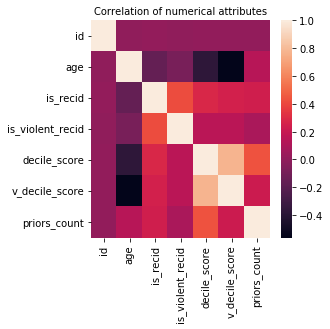

In [32]:
#Pearson correlation between numerical variables.
#Correlacion Pearson entre variables numericas.

correlation = df1.corr()
f, ax = plt.subplots(figsize=(4,4))
plt.title('Correlation of numerical attributes', size=10)
sns.heatmap(correlation)
plt.show()

In [33]:
correlation['v_decile_score'].sort_values(ascending=False).head(10)

v_decile_score      1.000000
decile_score        0.774353
is_recid            0.249663
priors_count        0.224631
is_violent_recid    0.157626
id                  0.006770
age                -0.562653
Name: v_decile_score, dtype: float64

In [34]:
correlation['decile_score'].sort_values(ascending=False).head(10)

decile_score        1.000000
v_decile_score      0.774353
priors_count        0.435560
is_recid            0.281845
is_violent_recid    0.152195
id                  0.009325
age                -0.372963
Name: decile_score, dtype: float64

From this pearson correlation we can see that is_recid, is_violent_recid together provide an approximation of 40% correlation with the 'Target' But it is not enough, so a two-year date range conditional will be added to calculate the recurrences
__________________
De esta correlacion de pearson podemos ver que is_recid, is_violent_recid en conjunto proveen una aproximacion del 40% de correlacion con el 'Target' Pero no es suficiente, por lo que se agregara un condicional de rango de fecha de dos años para calcular las reincidencias

In [35]:
df1.shape

(11038, 16)

In [36]:
#A variable is created with the date that will be filtered in the DF
#Se crea variable con la fecha que se filtrara en el DF
from datetime import datetime
fecha = '2014:01:01'
fecha_limite = datetime.strptime(fecha, '%Y:%M:%S')

Creation of the manual model with which we will seek to answer the questions. It is important to mention that this is what was used some years ago before Machine Learning, creating artificial features. Today, thanks to ML models, significantly higher results can be obtained. The importance of this is to explain and understand the workings behind a ML model.

Creación del modelo manual con el cual se buscará dar respuesta a las preguntas. Importante mencionar que esto es lo que hace alguno años se utilizaba antes del Machine Learning, creando features artificales. Actualmente gracias a los modelos de ML se pueden obtener resultados significativamente mayores. La importancia de esto es explicar y entender el funcionamiento detras de un modelo de ML.

In [37]:
def modelo1(caso):
    if  caso['is_violent_recid'] == 1 and caso['race'] == ('African-American') and caso['vr_offense_date'] > fecha_limite and caso['age_cat'=='Less than 25']:
        return 1
    else:
        return 0

In [38]:
score1 = df1.apply(lambda x: modelo1(x), axis = 1)

Verification of the effectiveness of our model. Quite low as expected.
Verificacion de la efectividad de nuestro modelo. Bastante bajo como era de esperarse. 

In [39]:
roc_auc_score((df1['v_score_text'] == 'High'), score1)

0.5357189029823406

### 3.- The threshold to establish preventive measures for recidivism is 7 or more.
Given this threshold, generate a contingency table, explaining which case is considered "positive" (and, therefore, what are the type I errors and the type II errors).

### 3.- El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante.
Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).

In [40]:
tc = pd.crosstab(score1, (df1['v_decile_score'] >= 7))
tc

v_decile_score,False,True
row_0,,
0,9051,1548
1,279,160


In [41]:
#Calcular prediccion de la feature para IS_RECID
#Predictions for IS_recid
def modelo2(caso):
    if  caso['is_recid'] == 1 or caso['is_violent_recid'] == 1 and caso['r_offense_date'] > fecha_limite and caso['age_cat'=='Less than 25'] and caso['sex'] == 'Male':
        return 1
    else:
        return 0

In [42]:
score2 = df1.apply(lambda x: modelo2(x), axis = 1).rename('Predicción')

In [43]:
roc_auc_score((df1['decile_score'] >= 7), score2)

#Feature que nos entrega un valor de aciertos cercano al 61%. 

0.6176102129465897

In [44]:
tc1 = pd.crosstab(score2, (df1['decile_score'] >= 7))
tc1

decile_score,False,True
Predicción,,
0,5877,1458
1,2200,1503


As can be seen in the upper contingency table, type I errors correspond to false positives in the upper right corner.
where 1458 people are considered according to the prediction as not possible
Repeat offenders do but actually have a Decile_Score> = 7.
Type II errors correspond to the lower left corner (2200 cases) where our prediction gives results of possible repeat offenders (> = 7) but in reality they are with a decile_score <7. False negatives.

Como se puede apreciar en la tabla de contigencia superior los errores de tipo I corresponden a los falsos positivos de la esquina superior derecha
en donde 1458 personas se consideran segun la predicción como no posibles 
reincidentes te pero en realidad tienen un Decile_Score >= 7.
Los errores de tipo II corresponden a la esquina inferior izquierda (2200 casos) en donde nuestra predicción entrega resultados de posibles reincidentes (>=7) pero en realidad estan con un decile_score <7. Falsos negativos.

## 4.- Graph the differences according to factors of race, sex and age
## 4.- Graficar las diferencias de acuerdos a factores de raza, sexo y edad 

In [45]:
#Decile_score and v_decile_score -1 values are removed to plot
#Se eliminan valores -1 de decile_score y v_decile_score para graficar
df1 = df1.drop(df1[df1['v_decile_score']==-1].index)
df1 = df1.drop(df1[df1['decile_score']==-1].index)


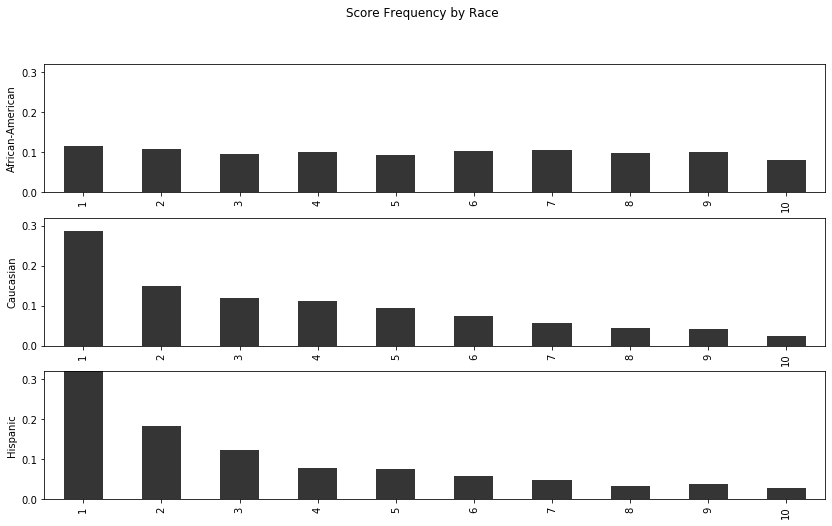

In [46]:

#RACE
dfgb = df1.groupby("race")
race_count = df1.groupby("race")["name"].count()

fig, ax = plt.subplots(3, figsize=(14, 8))

for (i, race) in enumerate(["African-American", "Caucasian", "Hispanic"]):
    (
        (dfgb
            .get_group(race)
            .groupby("decile_score")["name"].count() / race_count[race]
        )
        .plot(kind="bar", ax=ax[i], color="#353535")
    )
    ax[i].set_ylabel(race)
    ax[i].set_xlabel("")
   
    ax[i].set_ylim(0, 0.32)

fig.suptitle("Score Frequency by Race")
plt.show()

#### As can be seen in the graph, the distribution in the decile score of black people is uniformly distributed from 1 to 10, while for the other races, the vast majority of cases are in the lower values of the decile_score.

#### Como se puede ver en el gráfico, la distribucion en el decile score de las personas de raza negra se encuentra uniformemente distribuida del 1 al 10, Mientras que para las demas razas, la gran mayoría de los casos se encuentran en los valores mas bajos del decile_score.

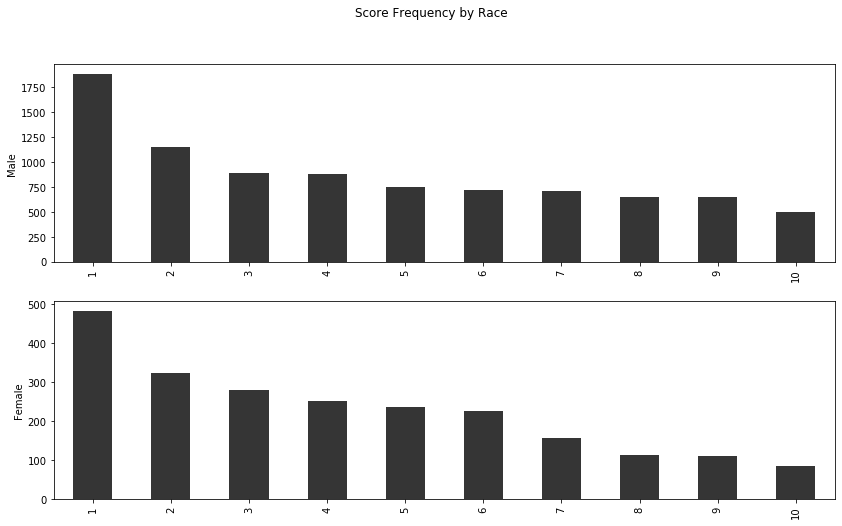

In [47]:
#Sex
dfgb = df1.groupby("sex")
race_count = df1.groupby("sex")["name"].count()

fig, ax = plt.subplots(2, figsize=(14, 8))

for (i, sex) in enumerate(["Male", "Female"]):
    (
        (dfgb
            .get_group(sex)
            .groupby("decile_score")["name"].count() 
         #/ race_count[race]
        )
        .plot(kind="bar", ax=ax[i], color="#353535")
    )
    ax[i].set_ylabel(sex)
    ax[i].set_xlabel("")
   
 #   ax[i].set_ylim(0, 0.)

fig.suptitle("Score Frequency by Race")
plt.show()

In the case of the differences for men and women, a tendency can be observed in the graph that fewer women are at the top of the decile_score than men.

Para el caso de las diferencias para hombres y mujeres se puede observar en la gráfica una tendencia a que menos mujeres estan en lo mas alto del decile_score a diferencia de los hombres. 

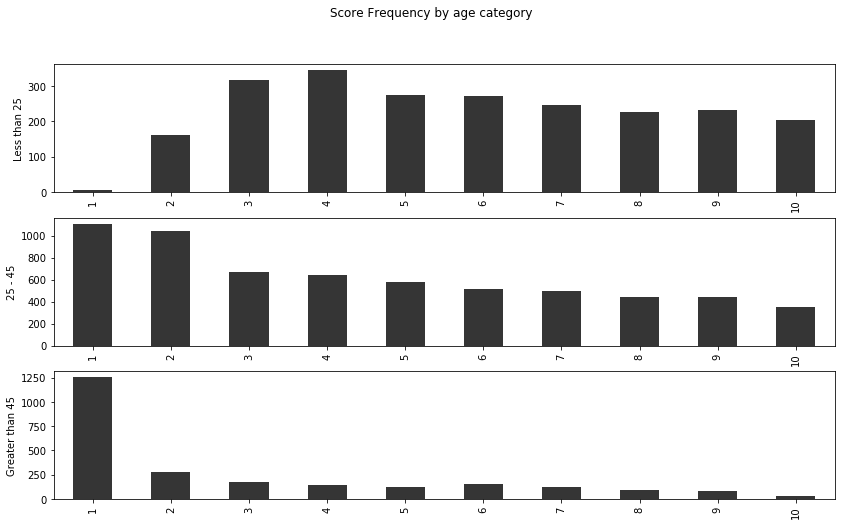

In [48]:
#Age
dfgb = df1.groupby("age_cat")
race_count = df1.groupby("age_cat")["name"].count()

fig, ax = plt.subplots(3, figsize=(14, 8))

for (i, age_cat) in enumerate(["Less than 25", "25 - 45", "Greater than 45"]):
    (
        (dfgb
            .get_group(age_cat)
            .groupby("decile_score")["name"].count() 
        )
        .plot(kind="bar", ax=ax[i], color="#353535")
    )
    ax[i].set_ylabel(age_cat)
    ax[i].set_xlabel("")
   
 #   ax[i].set_ylim(0, 0.)

fig.suptitle("Score Frequency by age category")
plt.show()

Finally, when analyzing the graphs for age, large differences can be seen between the 3 age groups plotted, where those under 25 years of age have a distribution that is highly oriented towards the highest indices, rather than differences from the older age group.

Finalmente al analisis de los graficos para edad, se pueden ver grandes diferencias entre los 3 grupos etarios graficados en donde los menores de 25 años tienen una distribución muy orientada hacia los indices mas alto a diferencias del grupo de mayor edad. 

5.- ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?
5.- For what types of risks, general crimes or violent crimes, does the system have the most predictive capacity?

According to the Feature created, both for is_recid and for is_violent recid the results are close to 54% correct. However, when using both columns of information (is_recid == 1 and is_violent_recid == 1) it is possible to obtain a value close to 60%, so it could be assumed that both data have a similar predictive power ///


De acuerdo a la Feature creada, tanto para is_recid, como para is_violent recid los resultados son cercanos al 54% de acierto. Sin embargo al utilizar ambas columans de informacion (is_recid == 1 and is_violent_recid == 1) se logta obtener un valor cercano al 60% por lo que podria asumir que ambas datas poseen un poder predictivo similar///